# Chapter 7. 머신러닝 데이터 분석

## 1. 머신러닝(Machine Learning) 개요
### 1-1. 머신러닝이란?
* 기계 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정
* 예측(Prediction), 분류(Classification), 군집(Clustering)

### 1-2. 지도 학습 vs 비지도 학습
#### 지도학습 (Supervised Learning)
* 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식  

#### 비지도 학습 (Unsupervised Learning)
* 정답 데이터 없이 컴퓨터 알고리즘이 스스로 데이터로부터 숨은 패턴을 찾아내는 방식  
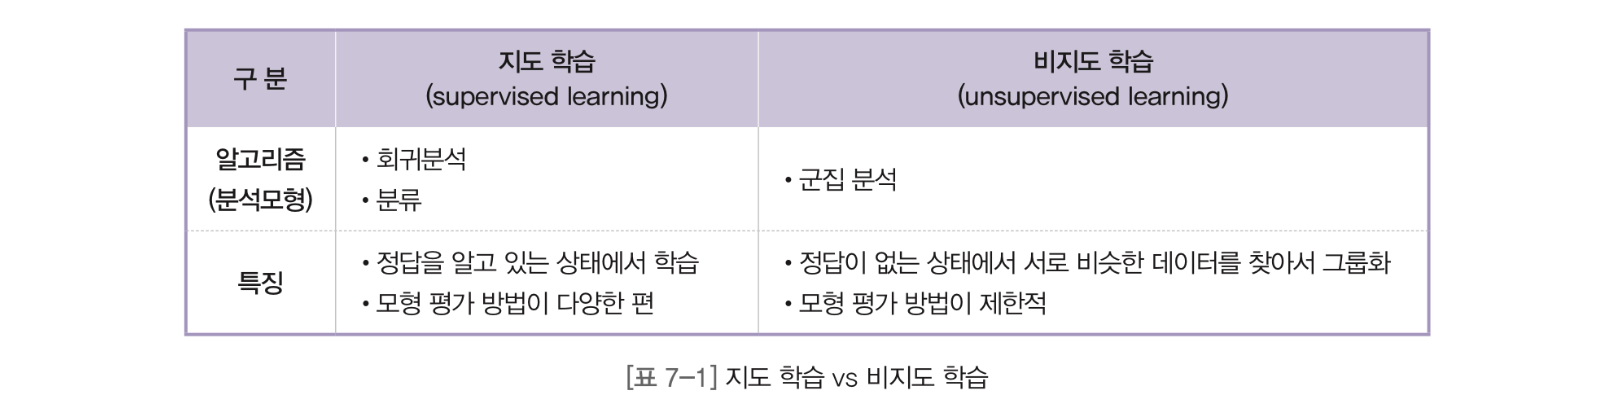

### 1-3. 머신러닝 프로세스
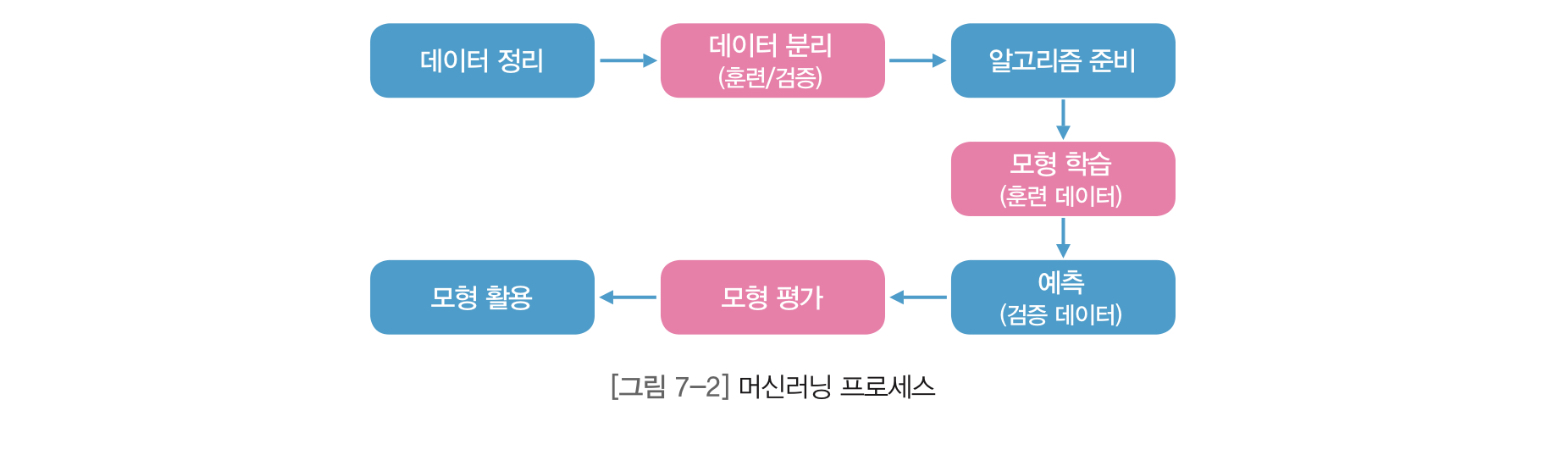

* 머신러닝 데이터 분석을 시작하기 전에 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터 변환
* 분석 대상에 관해 수집한 관측값을 속성을 기준으로 정리 → 판다스 활용
* df의 열이 데이터의 속성을 나타내는 변수 / df의 행이 하나의 관측값  

* 컴퓨터가 이해할 수 있도록 데이터프레임으로 변환 후, 속성간의 관계를 분석하여 결과를 예측하는 모형을 학습을 통해 찾음
* 훈련 데이터(Train Data): 모형 학습에 사용 되는 데이터 / 검증 데이터(Test Data): 학습을 마친 모형의 예측 평가에 사용 되는 데이터

## 2. 회귀(Regression) 분석
* 가장 간단한 알고리즘
* 가격, 매출, 주가, 환율, 수량 등 연속적인 값을 갖는 연속 변수를 예측하는데 주로 활용
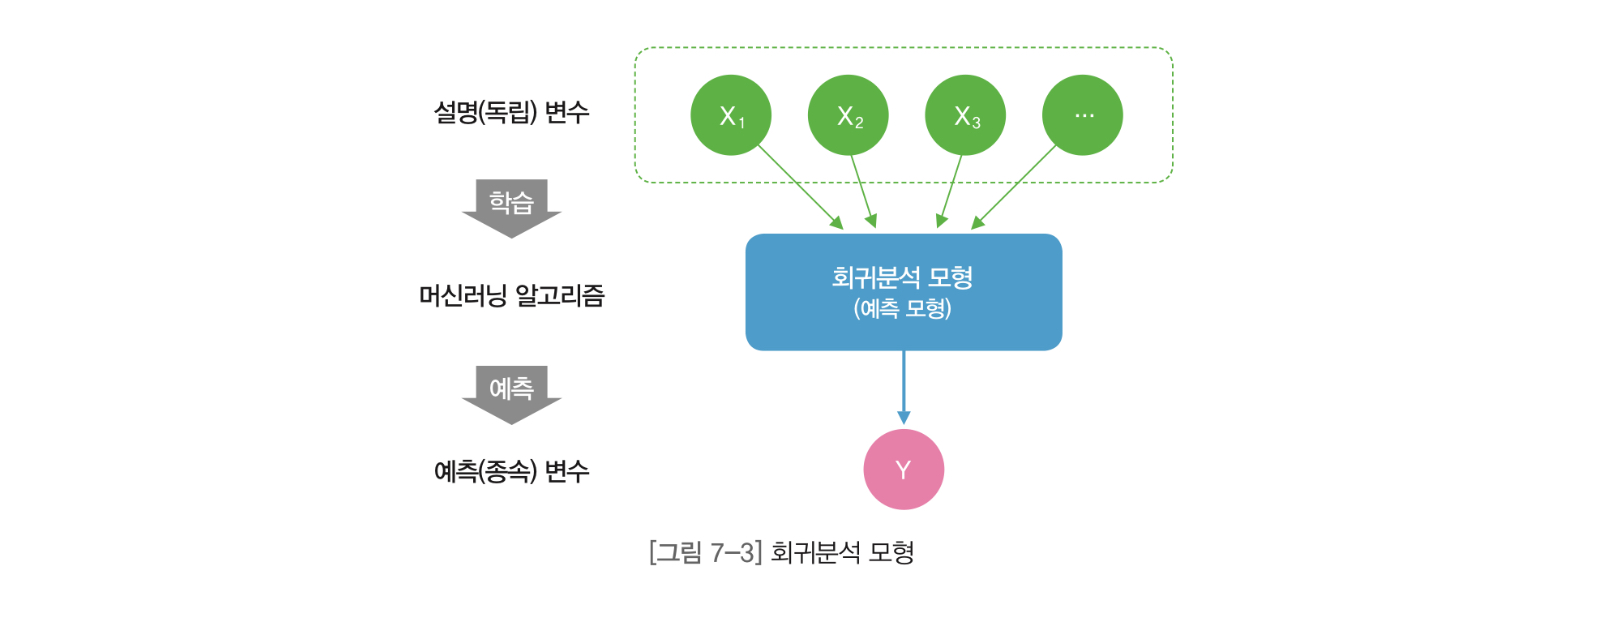

### 2-1. 단순 회귀 분석 (Simple Linear Regression)
* "소득 증가 → 소비 증가" 같은 어떤 변수(독립 변수 X)가 다른 변수(종속 변수 Y)에 영향을 주는 관계 : 선형관계
* 두 변수 사이에 일대일 대응되는 확률적, 통계적 상관성을 찾는 알고리즘
* 대표적인 지도학습 유형
* y = ax+b

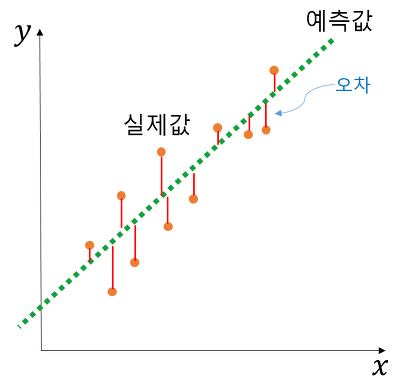

#### Step 1. 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)

In [4]:
# 데이터 살펴보기


#### Step 2. 데이터 탐색

In [6]:
# 데이터 자료형 확인
# info() 활용



In [7]:
# 데이터 통계 요약정보 확인
# describe() 활용


* horsepower 열의 자료형 변경 (문자열 ->숫자)

In [8]:
# horsepower 열의 고유값 확인
# unique() 활용


In [ ]:
# '?'을 np.nan으로 변경
# replace 메서드 활용


In [9]:
# 누락데이터 행을 삭제
# dropna 메서드 활용 / subset 옵션 = ['horesepower'], axis=0


In [ ]:
# 문자열을 실수형으로 변환


In [10]:
# 데이터 통계 요약정보 확인


#### Step 3. 속성(feature/variable) 선택

In [11]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)

# ndf 

In [12]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
# plot() 메서드 / 옵션: kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5)


# ndf


In [13]:
# seaborn으로 산점도 그리기
# figsize=(10, 5)
# fig   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# sns의 regplot 메서드 활용
# ax1 옵션: x='weight', y='mpg', data=ndf, ax=ax1
# ax2 옵션: x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False



NameError: name 'fig' is not defined

In [ ]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
# sns의 jointplot 메서드 활용
# 첫번째 그래프 옵션: x='weight', y='mpg', data=ndf
# 두번째 그래프 옵션: x='weight', y='mpg', kind='reg', data=ndf



In [19]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
# pairplot 메서드

#### Step 4. 데이터 셋 구분 - 훈련용(train data)/ 검증용(test data)

In [21]:
# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

In [22]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


#### Step 5. 단순휘귀분석 모형 - sklearn 사용

In [25]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b', lr.intercept_)


0.6822458558299325
기울기 a:  [-0.00775343]
y절편 b 46.710366257280086


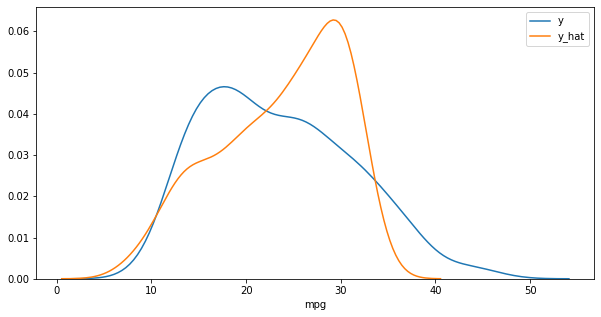

In [27]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()